# import Library

In [22]:
#import Library
from pandas import read_csv

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import auc, roc_curve, accuracy_score, f1_score, precision_score, recall_score, classification_report, matthews_corrcoef
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
%matplotlib inline


In [23]:
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU')) > 0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Tensor Flow Version: 2.6.0
Keras Version: 2.6.0

Python 3.7.11 (default, Jul 27 2021, 09:42:29) [MSC v.1916 64 bit (AMD64)]
Pandas 1.3.3
Scikit-Learn 1.0
GPU is available


# load dataset


In [24]:
# load dataset
data = read_csv("bike-buyer.csv")
data.shape

(56048, 14)

array([[<AxesSubplot:title={'center':'CustomerKey'}>,
        <AxesSubplot:title={'center':'ProductKey'}>,
        <AxesSubplot:title={'center':'ProductSubcategoryKey'}>],
       [<AxesSubplot:title={'center':'GeographyKey'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'HouseOwnerFlag'}>],
       [<AxesSubplot:title={'center':'TotalChildren'}>,
        <AxesSubplot:title={'center':'YearlyIncome'}>,
        <AxesSubplot:title={'center':'NumberChildrenAtHome'}>],
       [<AxesSubplot:title={'center':'NumberCarsOwned'}>,
        <AxesSubplot:title={'center':'BikeBuyer'}>, <AxesSubplot:>]],
      dtype=object)

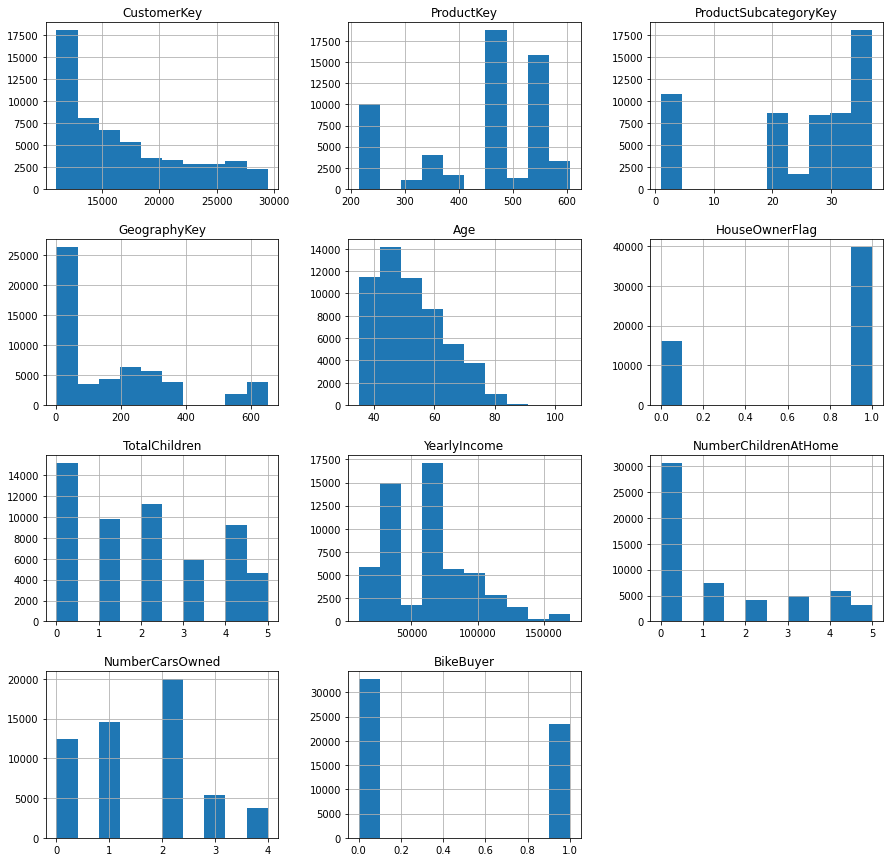

In [25]:
data.hist(figsize=(15,15))


In [26]:
cat_facts = ["CustomerKey", "ProductKey", "ProductSubcategoryKey", "GeographyKey", "Age", "HouseOwnerFlag", "TotalChildren", "YearlyIncome", "Gender", "MaritalStatus", "OrderNumber", "NumberChildrenAtHome", "NumberCarsOwned", "BikeBuyer"]
for cat_feature in cat_facts:
    print("\n--------------------------\n",cat_feature,data[cat_feature].unique())


--------------------------
 CustomerKey [18279 18597 18680 ... 27517 23850 23885]

--------------------------
 ProductKey [214 217 222 225 228 231 234 237 310 311 312 313 314 320 321 322 323 324
 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342
 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360
 361 362 363 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382
 383 384 385 386 387 388 389 390 463 465 467 471 472 473 474 475 476 477
 478 479 480 481 482 483 484 485 486 487 488 489 490 491 528 529 530 535
 536 537 538 539 540 541 560 561 562 563 564 565 566 567 568 569 570 571
 572 573 574 575 576 577 578 579 580 581 582 583 584 585 586 587 588 589
 590 591 592 593 594 595 596 597 598 599 600 604 605 606]

--------------------------
 ProductSubcategoryKey [31 19 21  2  1 20 25 22 28 37 23 26 29 30 27 32  3]

--------------------------
 GeographyKey [ 19 374 298 539  51  60  52 124 196 277 199 147 160 316 609 202 260  49
  39   6 267 233

In [27]:
# label_encoder object knows how to understand word labels. 
label_encoder = LabelEncoder()
data['Gender']= label_encoder.fit_transform(data['Gender'])
data['MaritalStatus']= label_encoder.fit_transform(data['MaritalStatus'])
data['OrderNumber']= label_encoder.fit_transform(data['OrderNumber']) 
print(data.head())
print(data.shape)

   CustomerKey  ProductKey  ProductSubcategoryKey  GeographyKey  Age  \
0        18279         214                     31            19   54   
1        18279         214                     31            19   54   
2        18597         214                     31           374   45   
3        18680         214                     31           298   42   
4        18806         214                     31           539   43   

   HouseOwnerFlag  TotalChildren  YearlyIncome  Gender  MaritalStatus  \
0               1              1         60000       0              1   
1               1              1         60000       0              1   
2               0              0         60000       0              0   
3               1              1         40000       1              0   
4               1              1         50000       0              0   

   OrderNumber  NumberChildrenAtHome  NumberCarsOwned  BikeBuyer  
0        10324                     0                1        

# get x,y


In [28]:
#get x,y
X = data.values[:,:-1]
Y = data.values[:,-1:]

# split the data into training and validation sets


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state =5)

# define min max scaler


In [30]:
#Normalize
scaler = MinMaxScaler()
# transform data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# create model 


In [31]:
model = Sequential([
    Dense(512, activation='relu', input_shape=[X_train.shape[1]]),
    BatchNormalization(),
    Dropout(0.3),
        
    Dense(384, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(1, activation='sigmoid')
])

# Compile model


In [32]:
# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1E-7), 
              metrics=['accuracy'])

In [33]:
checkpoint_path = "cp.ckpt"
# Create a callback that saves the model's weights
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                                              save_weights_only=True,
                                              save_best_only=True,
                                              verbose=1)



# Fit the model


In [34]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=650, batch_size=128, callbacks=[cp_callback])

Epoch 1/650
395/395 [==============================] - 4s 7ms/step - loss: 0.4421 - accuracy: 0.7857 - val_loss: 0.5343 - val_accuracy: 0.7688

Epoch 00001: val_loss improved from inf to 0.53429, saving model to cp.ckpt
Epoch 2/650
395/395 [==============================] - 3s 7ms/step - loss: 0.3809 - accuracy: 0.8167 - val_loss: 0.3463 - val_accuracy: 0.8293

Epoch 00002: val_loss improved from 0.53429 to 0.34625, saving model to cp.ckpt
Epoch 3/650
395/395 [==============================] - 3s 7ms/step - loss: 0.3599 - accuracy: 0.8265 - val_loss: 0.3332 - val_accuracy: 0.8351

Epoch 00003: val_loss improved from 0.34625 to 0.33323, saving model to cp.ckpt
Epoch 4/650
395/395 [==============================] - 3s 7ms/step - loss: 0.3408 - accuracy: 0.8364 - val_loss: 0.3073 - val_accuracy: 0.8505

Epoch 00004: val_loss improved from 0.33323 to 0.30729, saving model to cp.ckpt
Epoch 5/650
395/395 [==============================] - 3s 7ms/step - loss: 0.3264 - accuracy: 0.8461 - val_l

395/395 [==============================] - 3s 7ms/step - loss: 0.1897 - accuracy: 0.9187 - val_loss: 0.1638 - val_accuracy: 0.9301

Epoch 00039: val_loss did not improve from 0.16261
Epoch 40/650
395/395 [==============================] - 3s 7ms/step - loss: 0.1881 - accuracy: 0.9181 - val_loss: 0.1597 - val_accuracy: 0.9281

Epoch 00040: val_loss improved from 0.16261 to 0.15973, saving model to cp.ckpt
Epoch 41/650
395/395 [==============================] - 3s 7ms/step - loss: 0.1825 - accuracy: 0.9214 - val_loss: 0.1567 - val_accuracy: 0.9297

Epoch 00041: val_loss improved from 0.15973 to 0.15665, saving model to cp.ckpt
Epoch 42/650
395/395 [==============================] - 3s 7ms/step - loss: 0.1826 - accuracy: 0.9223 - val_loss: 0.1634 - val_accuracy: 0.9261

Epoch 00042: val_loss did not improve from 0.15665
Epoch 43/650
395/395 [==============================] - 3s 7ms/step - loss: 0.1810 - accuracy: 0.9230 - val_loss: 0.1595 - val_accuracy: 0.9310

Epoch 00043: val_loss did 


Epoch 00078: val_loss did not improve from 0.11794
Epoch 79/650
395/395 [==============================] - 3s 7ms/step - loss: 0.1478 - accuracy: 0.9383 - val_loss: 0.1191 - val_accuracy: 0.9486

Epoch 00079: val_loss did not improve from 0.11794
Epoch 80/650
395/395 [==============================] - 3s 7ms/step - loss: 0.1500 - accuracy: 0.9370 - val_loss: 0.1157 - val_accuracy: 0.9522

Epoch 00080: val_loss improved from 0.11794 to 0.11567, saving model to cp.ckpt
Epoch 81/650
395/395 [==============================] - 3s 7ms/step - loss: 0.1465 - accuracy: 0.9388 - val_loss: 0.1287 - val_accuracy: 0.9434

Epoch 00081: val_loss did not improve from 0.11567
Epoch 82/650
395/395 [==============================] - 3s 7ms/step - loss: 0.1470 - accuracy: 0.9383 - val_loss: 0.1182 - val_accuracy: 0.9500

Epoch 00082: val_loss did not improve from 0.11567
Epoch 83/650
395/395 [==============================] - 3s 7ms/step - loss: 0.1444 - accuracy: 0.9404 - val_loss: 0.1196 - val_accuracy

395/395 [==============================] - 3s 8ms/step - loss: 0.1261 - accuracy: 0.9471 - val_loss: 0.1127 - val_accuracy: 0.9534

Epoch 00119: val_loss did not improve from 0.10382
Epoch 120/650
395/395 [==============================] - 3s 9ms/step - loss: 0.1373 - accuracy: 0.9444 - val_loss: 0.1059 - val_accuracy: 0.9554

Epoch 00120: val_loss did not improve from 0.10382
Epoch 121/650
395/395 [==============================] - 3s 8ms/step - loss: 0.1342 - accuracy: 0.9449 - val_loss: 0.1036 - val_accuracy: 0.9550

Epoch 00121: val_loss improved from 0.10382 to 0.10357, saving model to cp.ckpt
Epoch 122/650
395/395 [==============================] - 3s 8ms/step - loss: 0.1263 - accuracy: 0.9478 - val_loss: 0.0989 - val_accuracy: 0.9591

Epoch 00122: val_loss improved from 0.10357 to 0.09888, saving model to cp.ckpt
Epoch 123/650
395/395 [==============================] - 3s 8ms/step - loss: 0.1266 - accuracy: 0.9475 - val_loss: 0.0998 - val_accuracy: 0.9599

Epoch 00123: val_loss 

395/395 [==============================] - 3s 8ms/step - loss: 0.1143 - accuracy: 0.9530 - val_loss: 0.0951 - val_accuracy: 0.9615

Epoch 00159: val_loss did not improve from 0.08866
Epoch 160/650
395/395 [==============================] - 3s 8ms/step - loss: 0.1136 - accuracy: 0.9535 - val_loss: 0.0904 - val_accuracy: 0.9641

Epoch 00160: val_loss did not improve from 0.08866
Epoch 161/650
395/395 [==============================] - 3s 8ms/step - loss: 0.1155 - accuracy: 0.9530 - val_loss: 0.0892 - val_accuracy: 0.9634

Epoch 00161: val_loss did not improve from 0.08866
Epoch 162/650
395/395 [==============================] - 3s 7ms/step - loss: 0.1134 - accuracy: 0.9529 - val_loss: 0.0931 - val_accuracy: 0.9632

Epoch 00162: val_loss did not improve from 0.08866
Epoch 163/650
395/395 [==============================] - 3s 7ms/step - loss: 0.1130 - accuracy: 0.9533 - val_loss: 0.0921 - val_accuracy: 0.9647

Epoch 00163: val_loss did not improve from 0.08866
Epoch 164/650
395/395 [======

395/395 [==============================] - 3s 9ms/step - loss: 0.1060 - accuracy: 0.9576 - val_loss: 0.0869 - val_accuracy: 0.9647

Epoch 00200: val_loss did not improve from 0.08201
Epoch 201/650
395/395 [==============================] - 3s 9ms/step - loss: 0.1035 - accuracy: 0.9582 - val_loss: 0.0841 - val_accuracy: 0.9666

Epoch 00201: val_loss did not improve from 0.08201
Epoch 202/650
395/395 [==============================] - 3s 9ms/step - loss: 0.1159 - accuracy: 0.9532 - val_loss: 0.0830 - val_accuracy: 0.9674

Epoch 00202: val_loss did not improve from 0.08201
Epoch 203/650
395/395 [==============================] - 3s 8ms/step - loss: 0.1133 - accuracy: 0.9543 - val_loss: 0.0852 - val_accuracy: 0.9666

Epoch 00203: val_loss did not improve from 0.08201
Epoch 204/650
395/395 [==============================] - 3s 8ms/step - loss: 0.1057 - accuracy: 0.9581 - val_loss: 0.0862 - val_accuracy: 0.9674

Epoch 00204: val_loss did not improve from 0.08201
Epoch 205/650
395/395 [======

395/395 [==============================] - 3s 9ms/step - loss: 0.1015 - accuracy: 0.9596 - val_loss: 0.0788 - val_accuracy: 0.9707

Epoch 00241: val_loss did not improve from 0.07841
Epoch 242/650
395/395 [==============================] - 3s 9ms/step - loss: 0.1036 - accuracy: 0.9583 - val_loss: 0.0788 - val_accuracy: 0.9688

Epoch 00242: val_loss did not improve from 0.07841
Epoch 243/650
395/395 [==============================] - 3s 8ms/step - loss: 0.0976 - accuracy: 0.9614 - val_loss: 0.0787 - val_accuracy: 0.9695

Epoch 00243: val_loss did not improve from 0.07841
Epoch 244/650
395/395 [==============================] - 3s 9ms/step - loss: 0.0962 - accuracy: 0.9614 - val_loss: 0.0796 - val_accuracy: 0.9688

Epoch 00244: val_loss did not improve from 0.07841
Epoch 245/650
395/395 [==============================] - 4s 9ms/step - loss: 0.0962 - accuracy: 0.9613 - val_loss: 0.0825 - val_accuracy: 0.9700

Epoch 00245: val_loss did not improve from 0.07841
Epoch 246/650
395/395 [======

395/395 [==============================] - 3s 8ms/step - loss: 0.0945 - accuracy: 0.9621 - val_loss: 0.0768 - val_accuracy: 0.9711

Epoch 00282: val_loss did not improve from 0.07389
Epoch 283/650
395/395 [==============================] - 3s 8ms/step - loss: 0.0905 - accuracy: 0.9630 - val_loss: 0.0800 - val_accuracy: 0.9707

Epoch 00283: val_loss did not improve from 0.07389
Epoch 284/650
395/395 [==============================] - 3s 9ms/step - loss: 0.0946 - accuracy: 0.9618 - val_loss: 0.0762 - val_accuracy: 0.9688

Epoch 00284: val_loss did not improve from 0.07389
Epoch 285/650
395/395 [==============================] - 4s 9ms/step - loss: 0.0896 - accuracy: 0.9641 - val_loss: 0.0779 - val_accuracy: 0.9702

Epoch 00285: val_loss did not improve from 0.07389
Epoch 286/650
395/395 [==============================] - 4s 9ms/step - loss: 0.0980 - accuracy: 0.9601 - val_loss: 0.0778 - val_accuracy: 0.9698

Epoch 00286: val_loss did not improve from 0.07389
Epoch 287/650
395/395 [======

395/395 [==============================] - 3s 8ms/step - loss: 0.0886 - accuracy: 0.9652 - val_loss: 0.0757 - val_accuracy: 0.9718

Epoch 00323: val_loss did not improve from 0.06952
Epoch 324/650
395/395 [==============================] - 3s 8ms/step - loss: 0.0861 - accuracy: 0.9661 - val_loss: 0.0722 - val_accuracy: 0.9738

Epoch 00324: val_loss did not improve from 0.06952
Epoch 325/650
395/395 [==============================] - 3s 8ms/step - loss: 0.0873 - accuracy: 0.9658 - val_loss: 0.0730 - val_accuracy: 0.9734

Epoch 00325: val_loss did not improve from 0.06952
Epoch 326/650
395/395 [==============================] - 3s 9ms/step - loss: 0.0980 - accuracy: 0.9609 - val_loss: 0.0744 - val_accuracy: 0.9718

Epoch 00326: val_loss did not improve from 0.06952
Epoch 327/650
395/395 [==============================] - 3s 9ms/step - loss: 0.0867 - accuracy: 0.9657 - val_loss: 0.0762 - val_accuracy: 0.9718

Epoch 00327: val_loss did not improve from 0.06952
Epoch 328/650
395/395 [======

395/395 [==============================] - 3s 8ms/step - loss: 0.0831 - accuracy: 0.9667 - val_loss: 0.0695 - val_accuracy: 0.9772

Epoch 00364: val_loss improved from 0.06952 to 0.06946, saving model to cp.ckpt
Epoch 365/650
395/395 [==============================] - 3s 7ms/step - loss: 0.0895 - accuracy: 0.9645 - val_loss: 0.0711 - val_accuracy: 0.9743

Epoch 00365: val_loss did not improve from 0.06946
Epoch 366/650
395/395 [==============================] - 3s 7ms/step - loss: 0.0927 - accuracy: 0.9634 - val_loss: 0.0703 - val_accuracy: 0.9743

Epoch 00366: val_loss did not improve from 0.06946
Epoch 367/650
395/395 [==============================] - 3s 7ms/step - loss: 0.0883 - accuracy: 0.9650 - val_loss: 0.0729 - val_accuracy: 0.9718

Epoch 00367: val_loss did not improve from 0.06946
Epoch 368/650
395/395 [==============================] - 3s 7ms/step - loss: 0.0856 - accuracy: 0.9662 - val_loss: 0.0720 - val_accuracy: 0.9734

Epoch 00368: val_loss did not improve from 0.06946


395/395 [==============================] - 3s 9ms/step - loss: 0.0810 - accuracy: 0.9681 - val_loss: 0.0676 - val_accuracy: 0.9750

Epoch 00405: val_loss did not improve from 0.06709
Epoch 406/650
395/395 [==============================] - 3s 9ms/step - loss: 0.0792 - accuracy: 0.9691 - val_loss: 0.0673 - val_accuracy: 0.9768

Epoch 00406: val_loss did not improve from 0.06709
Epoch 407/650
395/395 [==============================] - 3s 8ms/step - loss: 0.0828 - accuracy: 0.9671 - val_loss: 0.0681 - val_accuracy: 0.9750

Epoch 00407: val_loss did not improve from 0.06709
Epoch 408/650
395/395 [==============================] - 3s 8ms/step - loss: 0.0817 - accuracy: 0.9677 - val_loss: 0.0687 - val_accuracy: 0.9748

Epoch 00408: val_loss did not improve from 0.06709
Epoch 409/650
395/395 [==============================] - 3s 9ms/step - loss: 0.0820 - accuracy: 0.9680 - val_loss: 0.0661 - val_accuracy: 0.9761

Epoch 00409: val_loss improved from 0.06709 to 0.06607, saving model to cp.ckpt


395/395 [==============================] - 3s 7ms/step - loss: 0.0772 - accuracy: 0.9689 - val_loss: 0.0682 - val_accuracy: 0.9748

Epoch 00446: val_loss did not improve from 0.06429
Epoch 447/650
395/395 [==============================] - 3s 7ms/step - loss: 0.0797 - accuracy: 0.9691 - val_loss: 0.0669 - val_accuracy: 0.9748 0.0799 -  - ETA: 0s - loss: 0

Epoch 00447: val_loss did not improve from 0.06429
Epoch 448/650
395/395 [==============================] - 3s 7ms/step - loss: 0.0820 - accuracy: 0.9677 - val_loss: 0.0664 - val_accuracy: 0.9761

Epoch 00448: val_loss did not improve from 0.06429
Epoch 449/650
395/395 [==============================] - 3s 7ms/step - loss: 0.0816 - accuracy: 0.9674 - val_loss: 0.0676 - val_accuracy: 0.9745

Epoch 00449: val_loss did not improve from 0.06429
Epoch 450/650
395/395 [==============================] - 3s 9ms/step - loss: 0.0795 - accuracy: 0.9687 - val_loss: 0.0678 - val_accuracy: 0.9757

Epoch 00450: val_loss did not improve from 0.06429

395/395 [==============================] - 3s 8ms/step - loss: 0.0793 - accuracy: 0.9684 - val_loss: 0.0665 - val_accuracy: 0.9772

Epoch 00487: val_loss did not improve from 0.06325
Epoch 488/650
395/395 [==============================] - 4s 9ms/step - loss: 0.0779 - accuracy: 0.9697 - val_loss: 0.0677 - val_accuracy: 0.9786

Epoch 00488: val_loss did not improve from 0.06325
Epoch 489/650
395/395 [==============================] - 3s 9ms/step - loss: 0.0885 - accuracy: 0.9655 - val_loss: 0.0668 - val_accuracy: 0.9772

Epoch 00489: val_loss did not improve from 0.06325
Epoch 490/650
395/395 [==============================] - 3s 7ms/step - loss: 0.0794 - accuracy: 0.9684 - val_loss: 0.0662 - val_accuracy: 0.9770

Epoch 00490: val_loss did not improve from 0.06325
Epoch 491/650
395/395 [==============================] - 3s 7ms/step - loss: 0.0768 - accuracy: 0.9706 - val_loss: 0.0667 - val_accuracy: 0.9764

Epoch 00491: val_loss did not improve from 0.06325
Epoch 492/650
395/395 [======

395/395 [==============================] - 3s 8ms/step - loss: 0.0752 - accuracy: 0.9704 - val_loss: 0.0639 - val_accuracy: 0.9781

Epoch 00528: val_loss did not improve from 0.06100
Epoch 529/650
395/395 [==============================] - 3s 8ms/step - loss: 0.0753 - accuracy: 0.9710 - val_loss: 0.0631 - val_accuracy: 0.9770

Epoch 00529: val_loss did not improve from 0.06100
Epoch 530/650
395/395 [==============================] - 3s 8ms/step - loss: 0.0736 - accuracy: 0.9716 - val_loss: 0.0620 - val_accuracy: 0.9775

Epoch 00530: val_loss did not improve from 0.06100
Epoch 531/650
395/395 [==============================] - 3s 8ms/step - loss: 0.0750 - accuracy: 0.9707 - val_loss: 0.0657 - val_accuracy: 0.9773

Epoch 00531: val_loss did not improve from 0.06100
Epoch 532/650
395/395 [==============================] - 3s 9ms/step - loss: 0.0719 - accuracy: 0.9714 - val_loss: 0.0634 - val_accuracy: 0.9781

Epoch 00532: val_loss did not improve from 0.06100
Epoch 533/650
395/395 [======


Epoch 00569: val_loss did not improve from 0.06100
Epoch 570/650
395/395 [==============================] - 3s 8ms/step - loss: 0.0723 - accuracy: 0.9722 - val_loss: 0.0627 - val_accuracy: 0.9781

Epoch 00570: val_loss did not improve from 0.06100
Epoch 571/650
395/395 [==============================] - 3s 9ms/step - loss: 0.0735 - accuracy: 0.9711 - val_loss: 0.0579 - val_accuracy: 0.9781

Epoch 00571: val_loss improved from 0.06100 to 0.05793, saving model to cp.ckpt
Epoch 572/650
395/395 [==============================] - 3s 9ms/step - loss: 0.0701 - accuracy: 0.9728 - val_loss: 0.0568 - val_accuracy: 0.9793

Epoch 00572: val_loss improved from 0.05793 to 0.05676, saving model to cp.ckpt
Epoch 573/650
395/395 [==============================] - 3s 8ms/step - loss: 0.0688 - accuracy: 0.9735 - val_loss: 0.0586 - val_accuracy: 0.9777

Epoch 00573: val_loss did not improve from 0.05676
Epoch 574/650
395/395 [==============================] - 3s 9ms/step - loss: 0.0748 - accuracy: 0.9713

395/395 [==============================] - 3s 8ms/step - loss: 0.0707 - accuracy: 0.9729 - val_loss: 0.0621 - val_accuracy: 0.9788

Epoch 00611: val_loss did not improve from 0.05676
Epoch 612/650
395/395 [==============================] - 3s 9ms/step - loss: 0.0720 - accuracy: 0.9726 - val_loss: 0.0630 - val_accuracy: 0.9784

Epoch 00612: val_loss did not improve from 0.05676
Epoch 613/650
395/395 [==============================] - 3s 9ms/step - loss: 0.0722 - accuracy: 0.9721 - val_loss: 0.0605 - val_accuracy: 0.9786

Epoch 00613: val_loss did not improve from 0.05676
Epoch 614/650
395/395 [==============================] - 3s 9ms/step - loss: 0.0786 - accuracy: 0.9693 - val_loss: 0.0615 - val_accuracy: 0.9798

Epoch 00614: val_loss did not improve from 0.05676
Epoch 615/650
395/395 [==============================] - 3s 9ms/step - loss: 0.0752 - accuracy: 0.9706 - val_loss: 0.0603 - val_accuracy: 0.9793

Epoch 00615: val_loss did not improve from 0.05676
Epoch 616/650
395/395 [======

# evaluate the model

In [36]:
# evaluate the model
scores = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print(model.summary())


176/176 [==============================] - 0s 2ms/step - loss: 0.0604 - accuracy: 0.9791
accuracy: 97.91%
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               7168      
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 384)               196992    
_________________________________________________________________
batch_normalization_5 (Batch (None, 384)               1536      
_________________________________________________________________
dropout_5 (Dropout)          (None, 384)               0         
______________

# serialize model


In [37]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5


In [38]:
# serialize weights to HDF5
n = scores[1]*100
model.save_weights("model.h5")
model.save_weights(f"model acc {n}.h5")

print("Saved model to disk")
n

Saved model to disk


97.91257977485657

# later...

## load json and create model


In [39]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

## load weights into new model


In [40]:
# load weights into new model
loaded_model.load_weights("model.h5")
#model.load_weights("cp.ckpt")
print("Loaded model from disk")

Loaded model from disk


## evaluate loaded model on test data


In [41]:
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)
y_pred = loaded_model.predict(X_test)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 97.91%


Train: 0.996, Test: 0.979


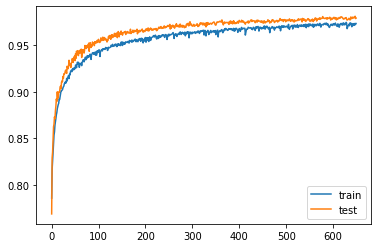

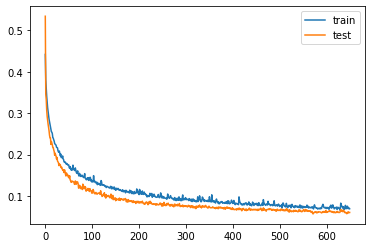

In [42]:
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [43]:
#y_pred = loaded_model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred.round())
print("accuracy:\t\t", accuracy_score(y_test, y_pred.round())*100)
print("precision_score:\t", precision_score(y_test, y_pred.round())*100)
print("recall_score:\t\t", recall_score(y_test, y_pred.round())*100)
print("f1_score:\t\t", f1_score(y_test, y_pred.round())*100)
print("matthews_corrcoef(MCC):\t", matthews_corrcoef(y_test, y_pred.round())*100)
print("ROC AUC:\t\t", auc(fpr, tpr)*100)
print("classification_report:\n", classification_report(y_test, y_pred.round()))

accuracy:		 97.91257805530776
precision_score:	 97.4587039390089
recall_score:		 97.58269720101781
f1_score:		 97.52066115702479
matthews_corrcoef(MCC):	 95.71822434102137
ROC AUC:		 97.86741881917229
classification_report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      3247
           1       0.97      0.98      0.98      2358

    accuracy                           0.98      5605
   macro avg       0.98      0.98      0.98      5605
weighted avg       0.98      0.98      0.98      5605

